<>:26: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\.'
C:\Users\SAI CHARAN DARISI\AppData\Local\Temp\ipykernel_4516\2340055974.py:26: SyntaxWarning: invalid escape sequence '\.'
  combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.02006

C:\Users\SAI CHARAN DARISI\AppData\Local\Temp\ipykernel_4516\2340055974.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)
C:\Users\SAI CHARAN DARISI\AppData\Local\Temp\ipykernel_4516\2340055974.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

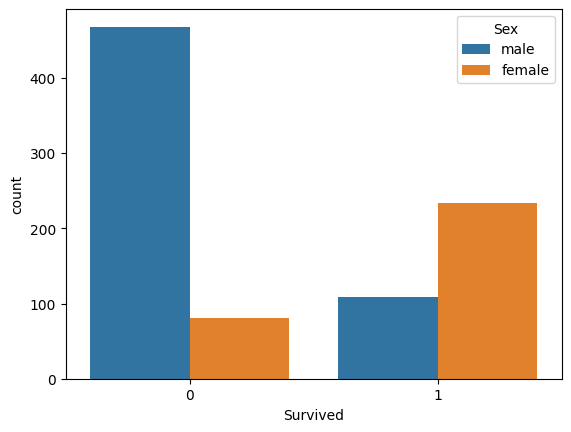

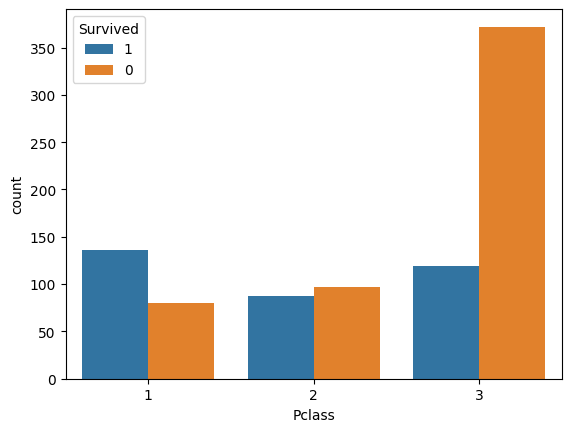

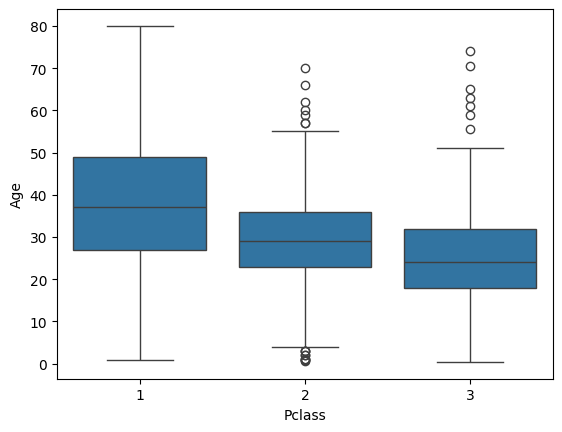

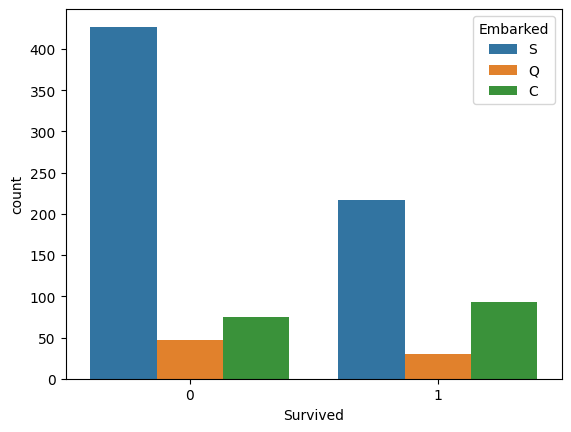

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


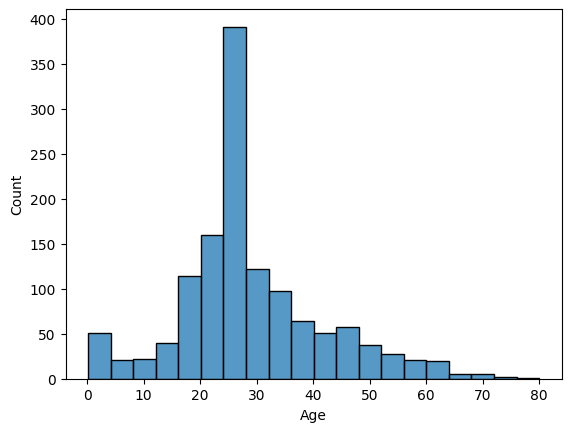

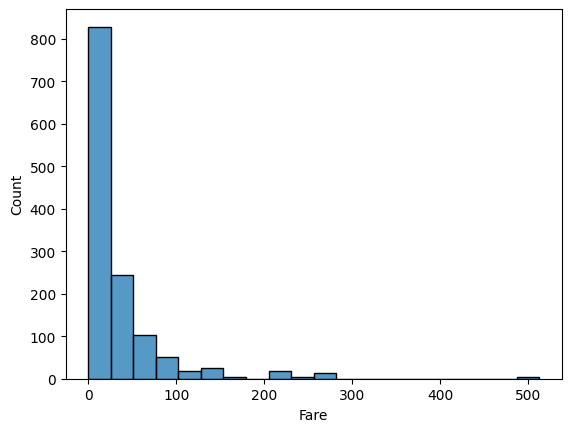

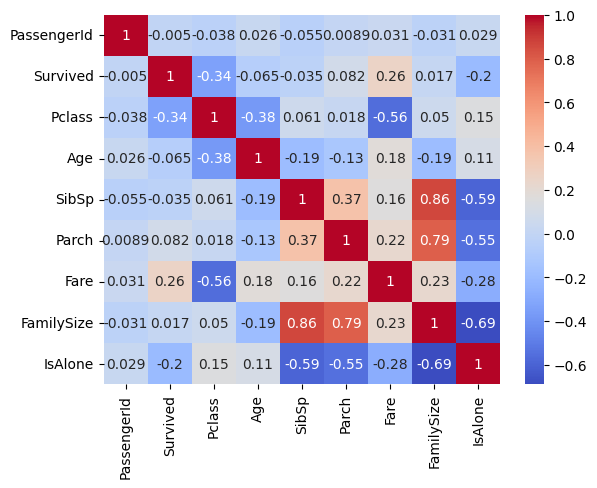

In [1]:
# Step 1: Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Data
train_df = pd.read_csv(r"F:\slutty_files\prodigy programs\task2\train.csv")
test_df = pd.read_csv(r"F:\slutty_files\prodigy programs\task2\test.csv")
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Step 3: Explore the Data
print(combined_df.info())
print(combined_df.describe())
print(combined_df.isnull().sum())

# Step 4: Data Cleaning
combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)
combined_df['Cabin'].fillna('Unknown', inplace=True)
combined_df['Deck'] = combined_df['Cabin'].str[0]

combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1
combined_df['IsAlone'] = (combined_df['FamilySize'] == 1).astype(int)
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Step 5: Exploratory Data Analysis (EDA)
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=train_df.astype({'Survived': str}))
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.show()

sns.countplot(x='Survived', hue='Embarked', data=train_df)
plt.show()

print(train_df.groupby('Sex')['Survived'].mean())
print(train_df.groupby('Pclass')['Survived'].mean())

sns.histplot(combined_df['Age'], bins=20)
plt.show()

sns.histplot(combined_df['Fare'], bins=20)
plt.show()

# Step 6: Calculate Correlation Matrix for Numeric Columns Only
numeric_cols = combined_df.select_dtypes(include=np.number).columns
corr_matrix = combined_df[numeric_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix.replace([np.inf, -np.inf], np.nan), annot=True, cmap='coolwarm')
plt.show()

# Step 7: Save Cleaned Data (Optional)
combined_df.to_csv('cleaned_titanic_data.csv', index=False)
